In [2]:
import sys
sys.path.append("../")
import os

from scipy import stats as st
from scipy import integrate
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm_notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib 
matplotlib.style.use('classic')

from scipy.optimize import newton, fsolve
from distribution import Pareto, Exp, Normal, Cauchy

from general_prior import *
import pickle as pkl
import pandas as pd
import seaborn as sns

In [3]:
param = {
    'sigmag': [3, 0.2],
    'a2': 0.1,
    'pg': [0.4, 0.6],
    'prior': Normal(1,1)
}  

In [4]:
!mkdir ./data/final

In [ ]:
data = u2_a1(param=param, heavy=True)

In [27]:
with open('./data/normal/{}.pkl'.format(str(param)), 'wb') as f:
    pkl.dump(data, f)

In [28]:
!ls ./data/final

__{'sigmag': [3, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
_{'sigmag': [3, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [0.2, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [0.2, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [1.0, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [1.0, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [2.0, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [2.0, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [3.0, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
light-{'sigmag': [3.0, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
{'sigmag': [3, 0.2], 'a2': 0.01, 'pg': [0.1, 0.9], 'prior': Normal(1, 1)}.pkl
{'sigmag': [3, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0

In [ ]:
!mv '{'sigmag': [3, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl'

In [30]:
del param['a1']

In [ ]:
param['a2']

## One-Stage Selection

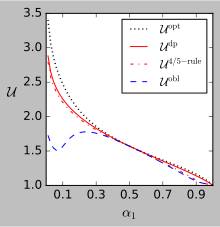

In [14]:
plt.figure(figsize=(3,3))
if 'a1' in param:
    del param['a1']
param['a2'] = 0.01
with open("./data/normal/{}.pkl".format(str(param)), 'rb') as f:
    data = pkl.load(f)
# plt.plot(data[0], np.array(data[1]['opt']/data[0]), ls=':', color='k', label="$\mathcal{U}^\mathrm{opt}$" )
plt.plot(data[0], np.array(data[1]['gr']) / data[0], ':', color='k', label="$\mathcal{U}^\mathrm{opt}$", lw=1.5)
plt.plot(data[0], np.array(data[1]['dp'])/data[0], '-', color='r', label="$\mathcal{U}^\mathrm{dp}$")
plt.plot(data[0], np.array(data[1]['beta'])/data[0], '-.', color='r', label="$\mathcal{U}^{4/5\mathrm{-rule}}$")
plt.plot(data[0], np.array(data[1]['sin'])/data[0], '--', color='b', label="$\mathcal{U}^\mathrm{obl}$")

plt.legend(loc='upper right',fontsize=12)
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$\mathcal{U}$\t", fontsize=14, rotation=0)
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.yticks()
plt.savefig("../fig/normal-u1.pdf", bbox_inches='tight')

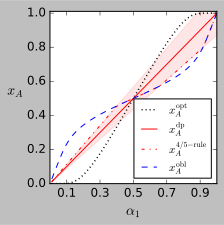

In [16]:
plt.figure(figsize=(3,3))
if 'a1' in param:
    del param['a1']
with open("./data/normal/{}.pkl".format(str(param)), 'rb') as f:
    data = pkl.load(f)
# plt.plot(data[0], np.array(data[1]['opt']/data[0]), ls=':', color='k', )
plt.plot(data[0], np.array(data[5]['gr'])[:,0], ':', color='k', label="$x_A^\mathrm{opt}$", lw=1.5)
plt.plot(data[0], np.array(data[5]['dp'])[:,0], '-', color='r', label="$x_A^\mathrm{dp}$")
plt.plot(data[0], np.array(data[5]['beta'])[:,0], '-.', color='r', label="$x_A^{4/5\mathrm{-rule}}$")
plt.plot(data[0], np.array(data[5]['sin'])[:,0], '--', color='b', label="$x_A^\mathrm{obl}$")
def f(xs):
    xs_ = []
    for x in xs:
        if x <= 1:
            xs_.append(x)
        else:
            xs_.append(1)
    return xs_
pa, pb = param['pg']
beta=0.8
a1s = data[0]
plt.fill_between(a1s,  f(a1s / (pa + beta* pb)), f(a1s * beta /(pa*beta + pb)), color='r', alpha=0.1,)

plt.legend(loc='lower right',fontsize=11)
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$x_A$\t", fontsize=14, rotation=0)
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.yticks()
plt.ylim(0, 1.01)
plt.savefig("../fig/normal-x-1-stage.pdf", bbox_inches='tight')

## Two-Stage Selection

In [17]:
!ls ./data/final/

In [18]:
if 'a1' in param:
    del param['a1']

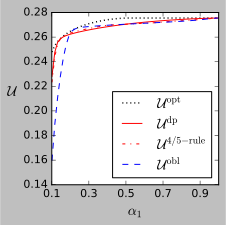

In [19]:
param['a2'] = 0.1
with open("./data/normal/{}.pkl".format(str(param)), 'rb') as f:
    data = pkl.load(f)
plt.figure(figsize=(3,3))

a1s = data[0]
plt.plot(a1s, data[2]['opt'], ':', color='k', label="$\mathcal{U}^\mathrm{opt}$", lw=1.5)
plt.plot(a1s, np.array(data[2]['dp']), '-', color='r', label="$\mathcal{U}^\mathrm{dp}$")
plt.plot(a1s, np.array(data[2]['beta']), '-.', color='r', label="$\mathcal{U}^{4/5\mathrm{-rule}}$")
plt.plot(a1s, np.array(data[2]['sin']), '--', color='b', label="$\mathcal{U}^\mathrm{obl}$")

plt.legend(loc='lower right', fontsize=14)
# plt.grid()
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$\mathcal{U}$\t", rotation=0, fontsize=14)
plt.savefig("../fig/normal-u.pdf", bbox_inches='tight')

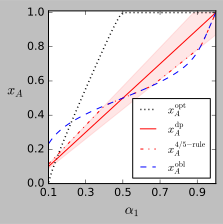

In [21]:
plt.figure(figsize=(3,3))
plt.plot(data[0], np.array(data[5]['opt'])[:,0], ':', color='k', label="$x_A^\mathrm{opt}$", lw=1.5)
plt.plot(data[0], np.array(data[5]['dp'])[:,0], '-', color='r', label="$x_A^\mathrm{dp}$")
plt.plot(data[0], np.array(data[5]['beta'])[:,0], '-.', color='r', label="$x_A^{4/5\mathrm{-rule}}$")
plt.plot(data[0], np.array(data[5]['sin'])[:,0], '--', color='b', label="$x_A^\mathrm{obl}$")

# plt.grid()

def f(xs):
    xs_ = []
    for x in xs:
        if x <= 1:
            xs_.append(x)
        else:
            xs_.append(1)
    return xs_
pa, pb = param['pg']
beta=0.8
a1s = data[0]
plt.fill_between(a1s,  f(a1s / (pa + beta* pb)), f(a1s * beta /(pa * beta + pb)), color='r', alpha=0.1,)



plt.legend(loc='lower right', fontsize=11)
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$x_A$\t", rotation=0, fontsize=14)
plt.ylim(0, 1.01)
plt.savefig("../fig/normal-x.pdf", bbox_inches='tight')

# Performance Gap

In [ ]:
param = {
    'sigmag': [3, 0.2],
    'a2': 0.01,
    'pg': [0.4, 0.6],
    'prior': Normal(1,1)
}  

facts = [1, 5, 10 ,15]
for fact in facts:
    param['sigmag'][0] = param['sigmag'][1] * fact
    print (param['sigmag'])
    data = u2_a1(param=param, heavy=False)
    if 'a1' in param:
        del param['a1']
    with open("./data/normal/light-{}.pkl".format(param), 'wb') as f:
        pkl.dump(data,f)

In [97]:
!ls -h ./data/final/

light-{'sigmag': [0.2, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [0.2, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [1.0, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [1.0, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [2.0, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [2.0, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [3.0, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
light-{'sigmag': [3.0, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior': Normal(1, 1), 'a1': 0.999}.pkl
{'sigmag': [3, 0.2], 'a2': 0.01, 'pg': [0.1, 0.9], 'prior': Normal(1, 1)}.pkl
{'sigmag': [3, 0.2], 'a2': 0.01, 'pg': [0.4, 0.6], 'prior': Normal(1, 1)}.pkl
{'sigmag': [3, 0.2], 'a2': 0.1, 'pg': [0.4, 0.6], 'prior

## One-Stage Selection

0 1
[0.2, 0.2]
1 5
[1.0, 0.2]
2 10
[2.0, 0.2]
3 15
[3.0, 0.2]


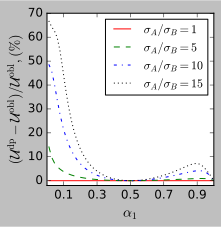

In [24]:
param['a2'] = 0.01
if 'a1' in param:
    del param['a1']

facts = [1, 5, 10 ,15]
plt.figure(figsize=(3,3))
color = ['r', 'g', 'b', 'k']
ls = ['-', '--', '-.', ':']
# param['a1']=0.999
for i, fact in enumerate(facts):
    print (i, fact)
    param['sigmag'][0] = param['sigmag'][1] * fact

    with open("./data/normal/light-{}.pkl".format(param), 'rb') as f:
        print(param['sigmag'])
        data = pkl.load(f)
        plt.plot(data[0], (np.array(data[1]['dp']) / np.array(data[1]['sin']) - 1) * 100, ls=ls[i], color=color[i],\
                 label="$\\sigma_A / \\sigma_B={}$".format(fact))
        
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$(\mathcal{U}^\mathrm{dp} - \mathcal{U}^\mathrm{obl}) / \mathcal{U}^\mathrm{obl}, (\%)$", fontsize=14)
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.yticks()
plt.ylim(-2, 70)
plt.legend(loc='upper right' ,fontsize=12)
plt.savefig("../fig/normal-u1-ratio-sigma.pdf", bbox_inches='tight')

## Two-Stage Selection

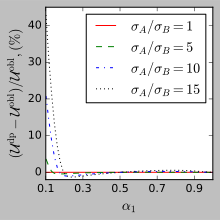

In [25]:
param['a2'] = 0.1
if 'a1' in param:
    del param['a1']
plt.figure(figsize=(3,3))
color = ['r', 'g', 'b', 'k']
ls = ['-', '--', '-.', ':']
facts = [1, 5, 10, 15]
for i, fact in enumerate(facts):
    param['sigmag'][0] = param['sigmag'][1] * fact
    with open("./data/normal/light-{}.pkl".format(param), 'rb') as f:
        data = pkl.load(f)
        plt.plot(data[0], (np.array(data[2]['dp']) / np.array(data[2]['sin']) - 1) * 100, ls=ls[i], color=color[i],\
                 label="$\\sigma_A / \\sigma_B={}$".format(fact))
#     plt.plot(data[0], np.array(data[2]['sin']), '--', color='b', label="$\mathcal{U}^\mathrm{greedy}$")
plt.xlabel("$\\alpha_1$", fontsize=14)
plt.ylabel("$(\mathcal{U}^\mathrm{dp} - \mathcal{U}^\mathrm{obl}) / \mathcal{U}^\mathrm{obl}, (\%)$", fontsize=14)
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], fontsize=11)
plt.yticks(fontsize=11)
plt.legend(loc='upper right' ,fontsize=14)
plt.ylim(-2,45)
plt.savefig("../fig/normal-u-sigma.pdf", bbox_inches='tight')

# Fairness at second stage

In [26]:
param = {
    'sigmag': [3, 0.2],
    'a2': 0.1,
    'pg': [0.4, 0.6],
    'prior': Normal(1,1)
}  
if 'a1' in param:
    del param['a1']

# param['a2'] = 0.01
with open("./data/normal/{}.pkl".format(param), 'rb') as f:
    data = pkl.load(f)
plt.figure(figsize=(3,3))
p2gs = {'dp': [], 'sin': [], 'opt': []}


for policy in p2gs:
    a1s = data[0]
    for i, a1 in enumerate(a1s):
        t1 = data[3][policy][i]
        t2 = data[4][policy][i]
        p2gs[policy].append([stage2g(t1[0], t2, param, g=0), stage2g(t1[1], t2, param, g=1)])

<Figure size 240x240 with 0 Axes>

Text(0,0.5,'$y$')

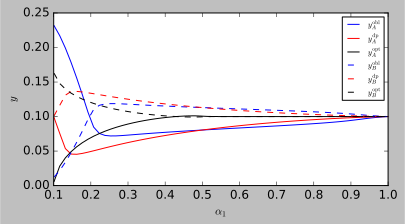

In [27]:
plt.figure(figsize=(6,3))
plt.plot(a1s, np.array(p2gs['sin'])[:,0], color='b', label='$y_A^\\mathrm{obl}$')
plt.plot(a1s, np.array(p2gs['dp'])[:,0], color='r', label='$y_A^\\mathrm{dp}$')
plt.plot(a1s, np.array(p2gs['opt'])[:,0], color='k', label='$y_A^\\mathrm{opt}$')
plt.plot(a1s, np.array(p2gs['sin'])[:,1], 'b--', label='$y_B^\\mathrm{obl}$')
plt.plot(a1s, np.array(p2gs['dp'])[:,1], 'r--', label='$y_B^\\mathrm{dp}$')
plt.plot(a1s, np.array(p2gs['opt'])[:,1], 'k--', label='$y_B^\\mathrm{opt}$')
plt.legend(loc='upper right', fontsize=8)
plt.xlabel("$\\alpha_1$", fontsize=11)
plt.ylabel('$y$', fontsize=11)
# plt.savefig("../fig/fairness-two-stages.pdf", bbox_inches='tight')